<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Нужно разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
def status(data):

    print(data.head())
    print()
    print('Информация о датасете: ')
    print(data.info())
    print('------------------------')
    print('Количество пропусков в данных')
    print(data.isna().sum())
    print('------------------------')
    print('Количество дупликатов в данных:', data.duplicated().sum())
    print('------------------------')
    print(data.describe())

In [4]:
status(df)

   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0

Информация о датасете: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
------------------------
Количество пропусков в данных
Пол                  0
Возраст              0
Зарплата             0
Член

В столбцах 'Возраст' и 'Зарплата' неверный тип данных - необходимо заменить тип данных на 'Int64'.Необходимо избавитсья от дубликатов. Так же столбцы в датасете не соответсвуют правилам записи

In [5]:
# Удалим дупликаты
df = df.drop_duplicates()

In [6]:
# Изменим тип данных в столбцах Возраст и Зарплата на целочисленный
df['Возраст'] = df['Возраст'].astype('int64')
df['Зарплата'] = df['Зарплата'].astype('int64')

In [7]:
df.rename(columns = {'Пол':'gender', 'Возраст':'age', 'Зарплата':'salary', 'Члены семьи':'family_members', 'Страховые выплаты':'payments'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          4847 non-null   int64
 1   age             4847 non-null   int64
 2   salary          4847 non-null   int64
 3   family_members  4847 non-null   int64
 4   payments        4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


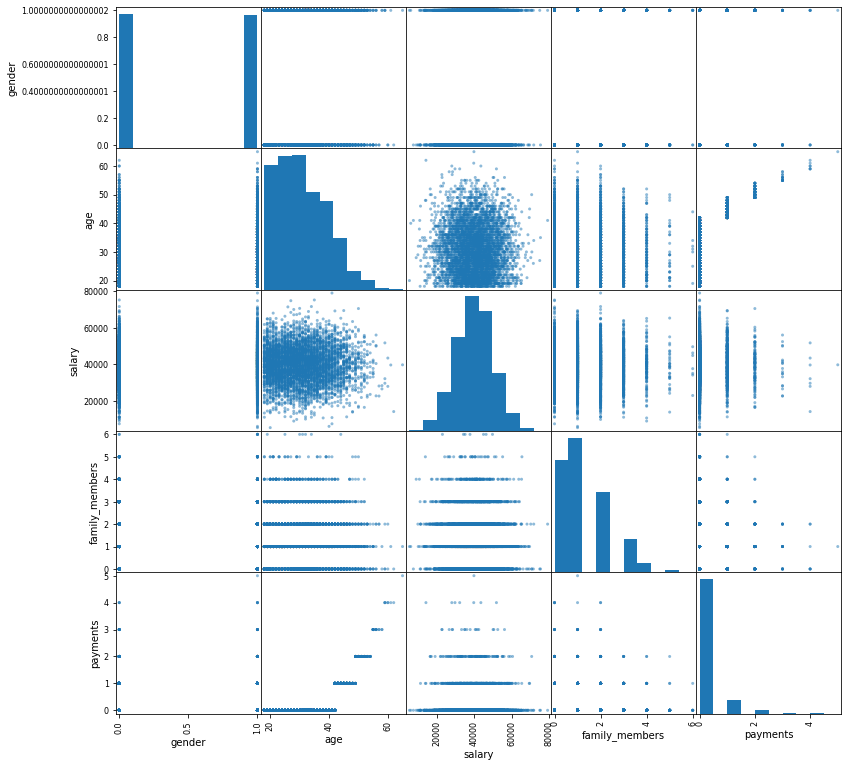

In [8]:
#Изучим корреляцию данных в матрице диаграмм рассеяния
pd.plotting.scatter_matrix(df,figsize=(13, 13));

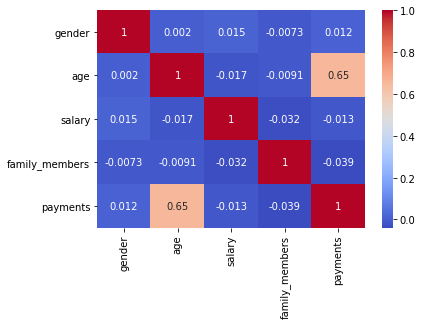

In [9]:
#Выразим матрицу в более легком для восприятия виде
sns.heatmap(df.corr(), annot = True, fmt='.2g', cmap= 'coolwarm');

- **Данные загружены и изучены, проведена переработка, удалены дубликаты в данных.**
- **Значительная корреляция есть между целевым признаком и возрастом клиента.**

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:
 
$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Нужно получить ответ на вопрос и обосновать решение. 
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 - a. Изменится. Приведите примеры матриц.
 - b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** B - Не изменится

**Обоснование:**

Воспользуемся формулой обучения

$$w = (X^T X)^{-1} X^T y$$

Представим новую матрицу признаков $X1$ как произведение старой $X$ на матрицу $P$ (обратимую):

$$X1 = X * P$$

Подставим новое значение X1 в формулу $w1$:

$$w1 = ((X P)^T X P)^{-1} (X P)^T y$$

Раскроем первое произведение $ (XP)^T $:

$$w1 = (P^T X^T X P)^{-1} P^T X^T y$$

Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:

$$w1 = (P^T (X^T X) P)^{-1} P^T X^T y$$

Раскроем скобки $ (P^T (X^T X) P)^{-1} $:

$$w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$

Так как $P$ по условию обратимая, то произведение $(P^T)^{-1} P^T$ равно $E$ (единичная матрица):

$$w1 = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y$$

Можно заметить, что справа получилась формула для $w$:

$$w1 = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w$$

Подставим новое значение весов  𝑤1  в формулу для предсказаний линейной регрессии.\n",
    "Предсказания модели расчитываются по формуле:

$$a = Xw$$

Подставим в эту формулу значения $X1$ и $w1$ для того, чтобы на их основе вычислить предсказания модели $a1$:

$$a1 = X1w1 = XPP^{-1} w$$

Так как $P$ по условию обратимая, то произведение $PP^{-1}$ снова равно $E$:

$$a1 = XPP^{-1} w = X E w = X w = a$$

В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w1$ связаны следующим образом:

$$w1 = P^{-1} w$$

**Выходит что $a = a1$**

Вывод: Мы доказали, что предсказания 
 для матрицы признаков, умноженных на обратимую матрицу 
 равны предсказаниям 
.
Следовательно, отвечая на вопрос изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу - нет, не изменится. При умножении признаков на обратимую матрицу качество линейной регрессии не изменится. Зависимость между параметрами линейная.

## Алгоритм преобразования

**Алгоритм**

Чтобы защитить данные и потерять качество модели машинного обучения, нужно умножить признаки на обратимую матрицу 
. Для этого алгоритм преобразования данных должен содержать процесс создания подобной матрицы 
 и ее умножения на матрицу признаков.
 
 При умножении исходной матрицы на обратимую должна получаться матрица такого же размера, как исходная, следовательно, ключом должна быть обратимая квадратная матрица с размером, равным количеству признаков
 
 Проверим обратимость такой матрицы:

In [10]:
rdm_matrix = np.random.randint(100,size = (4, 4))
display(rdm_matrix)

array([[ 9, 10, 39, 91],
       [33, 86, 75,  6],
       [46, 20, 83, 64],
       [33, 47,  5, 19]])

In [11]:
matrix_inv = np.linalg.inv(rdm_matrix)
display(matrix_inv)

array([[-0.01764765, -0.0144251 ,  0.02002406,  0.0216288 ],
       [ 0.00745393,  0.010544  , -0.01339753,  0.00609846],
       [-0.00179704,  0.00783719,  0.00682663, -0.01686299],
       [ 0.01268543, -0.00309082, -0.00343384,  0.00441772]])

Т.к код сработал без ошибок - значит матрица обратима



In [12]:
#Создадим выборки
features = df.drop('payments', axis = 1)
target = df['payments']

In [13]:
#Выполним масштабирование с признаков
scaler = StandardScaler()
scaler.fit(features)

features_scaled = scaler.transform(features)

Веса для исходных признаков расчитаем по формуле по формуле $w = (X^T X)^{-1} X^T y$, а вектор предсказаний для исходных признаков по формуле $a = X w$

In [14]:
#Рассчет веса для исходных признаков
w = np.linalg.inv(features_scaled.T.dot(features_scaled)).dot(features_scaled.T).dot(target)

Расчет вектора предсказаний для исходных признаков по формуле $$
𝑎=𝑋𝑤
$$

In [15]:
a = features_scaled @ w

Преобразование признаков

In [16]:
new_features = features_scaled @ rdm_matrix

Рассчитаем веса для преобразованных признаков по формуле $$
w = (X^T X)^{-1} X^T y
$$

In [17]:
w1 = np.linalg.inv(new_features.T.dot(new_features)).dot(new_features.T).dot(target)

Вектор предсказаний для преобразованным признакам по формуле: $$
𝑎=𝑋𝑤
$$

In [18]:
a1 = features_scaled @ w1

In [19]:
#Получим вектор разниц между предсказаниями по исходным признакам  𝑎  и преобразованным  𝑎1 :
diff_error = a - a1
display(diff_error.sum())

1.7763568394002505e-14

Полученное значение доказывает слишком низкое чтобы повлять на качество линейной регрессии

**Обоснование**

Т.к мы уже доказали в прошлом разделе, что предсказания 
 для матрицы признаков, умноженных на обратимую матрицу 
 равны предсказаниям, , значит мы можем записать данные в виде результата произведения признаков и обратимой матрицы.

**Вывод:**

Создан алгоритм который позволит зашифровать информацию на основе исходных данных и не повлияет на качество машинного обучения для метода линейной регрессии.

## Проверка алгоритма

In [20]:
def check_model(pred,target):
    model = LinearRegression()
    model.fit(pred, target)
    answer = model.predict(pred)
    return answer

In [21]:
print('R2-Score для модели до преобразований:', r2_score(target, check_model(features, target)))
print('R2-Score для модели после преобразований:', r2_score(target, check_model(new_features, target)))

R2-Score для модели до преобразований: 0.4302010046633359
R2-Score для модели после преобразований: 0.4302010046633359


In [22]:
print('MSE для модели до преобразований:', mean_squared_error(target, check_model(features, target)))
print('MSE для модели после преобразований:', mean_squared_error(target, check_model(new_features, target)))

MSE для модели до преобразований: 0.1252726382276536
MSE для модели после преобразований: 0.1252726382276536


## Общий вывод

Итоговая проверка алгоритма доказывает ранее сформированный вывод, что предсказания для матрицы признаков, умноженных на обратимую матрицу равны предсказаниям, , значит мы можем записать данные в виде результата произведения признаков и обратимой матрицы.

Итоговые значения проверки алгоритма:

 - R2-Score для модели до преобразований: 0.4302010046633359
 - R2-Score для модели после преобразований: 0.4302010046633359
 ----------------------------------------------------------
 - MSE для модели до преобразований: 0.1252726382276536
 - MSE для модели после преобразований: 0.1252726382276536


Отсутвия различий итоговой проверки алгоритма в метриках R2-score и MSE говорят о том, что преобразованные данные не повлияет на качество модели линейной регрессии